In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### If heights and weights of all individuals is the population here we got a sample of 10000 which constitutes a part of the population called sample

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:
df = df.drop(['Gender'],axis=1)

In [5]:
import seaborn as sns

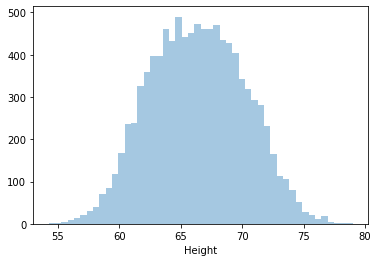

In [6]:
sns.distplot(df.Height,kde = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x215630f2310>,
 'caps': [<matplotlib.lines.Line2D at 0x215630f29d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x215630dff70>],
 'medians': [<matplotlib.lines.Line2D at 0x215630fb0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x215630fb3d0>],
 'means': []}

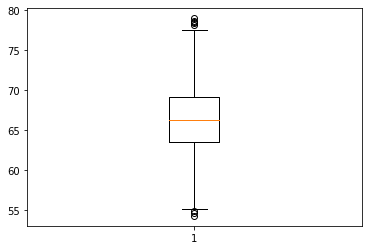

In [7]:
plt.boxplot(df.Height)

In [8]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [9]:
df.shape

(10000, 2)

In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
sigma = np.std(df['Height'])
mu = np.mean(df['Height'])

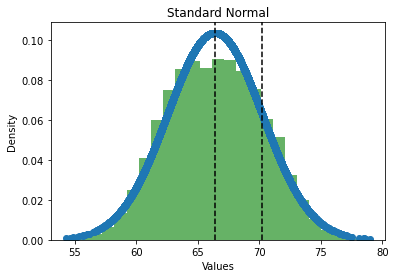

In [12]:
#plt.figure(figsize=(10,10))
plt.hist(df['Height'], bins=25, density=True, alpha=0.6, color='g')
plt.plot(df['Height'],norm.pdf(df['Height'],mu,sigma),'o')
plt.axvline(mu,color = 'k',linestyle = '--')
plt.axvline(mu+1*sigma,color = 'k',linestyle = '--')

plt.title("Standard Normal")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

In [13]:
from scipy import stats
stats.norm.interval(0.683, loc=mu, scale=sigma)

(62.51775468452707, 70.21736482511506)

### How to find the area under the curve which is 0.68 for mu = 0 and sigma = 1

In [14]:
# Make a PDF for the normal distribution a function
from scipy.integrate import quad
import numpy as np
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -1 to 1
result, _ = quad(normalProbabilityDensity, -3, 3,limit = 1000)
print(result)

0.9973002039367399


In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [16]:
sigma = np.std(df['Height'])
mu = np.mean(df['Height'])
# create distribution

dist = norm(mu, sigma)

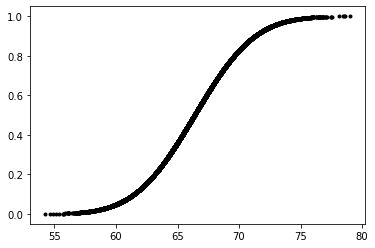

In [17]:
# plot cdf
cprobs = [dist.cdf(i) for i in df['Height']]
plt.plot(df['Height'], cprobs,'k.')
plt.show()